<a id='Top'></a>
# Analytics Programming: Module 10
## Aggregating NYC Vehicle Crash Data
#### Alan Leidner Nov 10, 2019

To demonstrate data aggregation, I will ingest the NYC Vehicle Crash Data into a pandas DataFrame using the Socrata API. I will then look at a few rows to see what data I can group to understand the dataframe.

In [1]:
import pandas as pd
pd.set_option('display.max.columns', None) # Let's me see all columns when calling a dataframe
crashes = pd.read_csv("https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=2000000")
pd.to_datetime(crashes['date']) #makes the date easier to work with later

/Users/leidner/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0         2013-06-30
1         2019-05-20
2         2014-12-12
3         2018-09-14
4         2012-07-01
5         2012-07-01
6         2012-07-01
7         2012-07-01
8         2012-07-01
9         2012-07-01
10        2012-07-01
11        2012-07-01
12        2012-07-01
13        2012-07-01
14        2012-07-01
15        2018-09-14
16        2012-07-01
17        2012-07-01
18        2012-07-01
19        2012-07-01
20        2012-07-01
21        2012-07-01
22        2012-07-01
23        2012-07-01
24        2012-07-01
25        2012-07-01
26        2012-07-01
27        2012-07-01
28        2012-07-01
29        2012-07-01
             ...    
1600008   2012-07-01
1600009   2012-07-01
1600010   2012-07-01
1600011   2012-07-05
1600012   2012-07-03
1600013   2012-07-01
1600014   2012-07-03
1600015   2012-07-03
1600016   2012-07-02
1600017   2012-07-02
1600018   2012-07-05
1600019   2012-07-02
1600020   2012-07-04
1600021   2012-07-03
1600022   2012-07-01
1600023   2012-07-05
1600024   201

In [2]:
crashes.head()

,date,time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2013-06-30T00:00:00.000,16:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0,0,0,0,2,0,Fatigued/Drowsy,Unspecified,NaN,NaN,NaN,2919091,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,2019-05-20T00:00:00.000,17:40,NaN,NaN,NaN,NaN,NaN,AMBOY ROAD,TIMBER RIDGE DRIVE,NaN,1.0,0.0,0,0,0,0,1,0,Unsafe Lane Changing,Unsafe Lane Changing,NaN,NaN,NaN,4135542,Motorcycle,Sedan,NaN,NaN,NaN
2,2014-12-12T00:00:00.000,21:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Lost Consciousness,Unspecified,NaN,NaN,NaN,3136004,PASSENGER VEHICLE,LARGE COM VEH(6 OR MORE TIRES),NaN,NaN,NaN
3,2018-09-14T00:00:00.000,21:54,BRONX,10472,NaN,NaN,NaN,CROSS BRONX EXPWY SERVICE ROAD,CROES AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Following Too Closely,NaN,NaN,NaN,3981591,Sedan,Sedan,NaN,NaN,NaN
4,2012-07-01T00:00:00.000,9:57,MANHATTAN,10065,40.765242,-73.957868,POINT (-73.9578679 40.7652424),1 AVENUE,EAST 68 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Other Vehicular,Other Vehicular,NaN,NaN,NaN,44907,PASSENGER VEHICLE,TAXI,NaN,NaN,NaN


It looks like borough is an ideal candidate for aggregation. It only has a limited number of variables, and we can easily find some algabraic values of the data.

In [3]:
crash_borough = crashes.groupby('borough').number_of_persons_killed.agg(['count', 'mean', 'std'])
crash_borough

,count,mean,std
borough,,,
BRONX,155377,0.001030,0.032273
BROOKLYN,346252,0.001149,0.034975
MANHATTAN,268077,0.000824,0.032134
QUEENS,296967,0.001209,0.037811
STATEN ISLAND,48410,0.001343,0.037730


I guess I'll try to stay out of Brooklyn. That has the hieghest death rate anyway. Manhattan seams to have a lower average than I would expect, but the safest place to be is apparently Staten Island! 

That information is useful, but I wonder if I could also break it out over time, to see which boroughs are getting safer, and which are getting more dangerous.

I will try to create seperate dataframes for each borough now, each displaying the fatality count over time.

In [4]:
crash_bronx = crashes[crashes['borough'] == 'BRONX'].groupby('date').number_of_persons_killed.sum()
crash_bronx.index = pd.to_datetime(crash_bronx.index)
crash_bronx_year_grouped = crash_bronx.groupby(pd.Grouper(freq="Y"))
crash_bronx_year = pd.DataFrame(crash_bronx_year_grouped.sum())
crash_bronx_year

,number_of_persons_killed
date,
2012-12-31,17.0
2013-12-31,32.0
2014-12-31,19.0
2015-12-31,26.0
2016-12-31,19.0
2017-12-31,17.0
2018-12-31,21.0
2019-12-31,9.0


In [5]:
crash_brooklyn = crashes[crashes['borough'] == 'BROOKLYN'].groupby('date').number_of_persons_killed.sum()
crash_brooklyn.index = pd.to_datetime(crash_brooklyn.index)
crash_brooklyn_year_grouped = crash_brooklyn.groupby(pd.Grouper(freq="Y"))
crash_brooklyn_year = pd.DataFrame(crash_brooklyn_year_grouped.sum())
crash_brooklyn_year

,number_of_persons_killed
date,
2012-12-31,33.0
2013-12-31,67.0
2014-12-31,67.0
2015-12-31,67.0
2016-12-31,37.0
2017-12-31,40.0
2018-12-31,39.0
2019-12-31,48.0


In [6]:
crash_manhattan = crashes[crashes['borough'] == 'MANHATTAN'].groupby('date').number_of_persons_killed.sum()
crash_manhattan.index = pd.to_datetime(crash_manhattan.index)
crash_manhattan_year_grouped = crash_manhattan.groupby(pd.Grouper(freq="Y"))
crash_manhattan_year = pd.DataFrame(crash_manhattan_year_grouped.sum())
crash_manhattan_year

,number_of_persons_killed
date,
2012-12-31,21.0
2013-12-31,39.0
2014-12-31,35.0
2015-12-31,22.0
2016-12-31,34.0
2017-12-31,33.0
2018-12-31,19.0
2019-12-31,18.0


In [7]:
crash_queens = crashes[crashes['borough'] == 'QUEENS'].groupby('date').number_of_persons_killed.sum()
crash_queens.index = pd.to_datetime(crash_queens.index)
crash_queens_year_grouped = crash_queens.groupby(pd.Grouper(freq="Y"))
crash_queens_year = pd.DataFrame(crash_queens_year_grouped.sum())
crash_queens_year

,number_of_persons_killed
date,
2012-12-31,28.0
2013-12-31,71.0
2014-12-31,52.0
2015-12-31,51.0
2016-12-31,31.0
2017-12-31,40.0
2018-12-31,53.0
2019-12-31,33.0


In [8]:
crash_si = crashes[crashes['borough'] == 'STATEN ISLAND'].groupby('date').number_of_persons_killed.sum()
crash_si.index = pd.to_datetime(crash_si.index)
crash_si_year_grouped = crash_si.groupby(pd.Grouper(freq="Y"))
crash_si_year = pd.DataFrame(crash_si_year_grouped.sum())
crash_si_year

,number_of_persons_killed
date,
2012-12-31,11.0
2013-12-31,4.0
2014-12-31,10.0
2015-12-31,12.0
2016-12-31,9.0
2017-12-31,8.0
2018-12-31,7.0
2019-12-31,4.0


Useful information, but a pain to read and compare. I *could* combine them all into a single dataframe.... but I think a graph would communicate the information more easily.

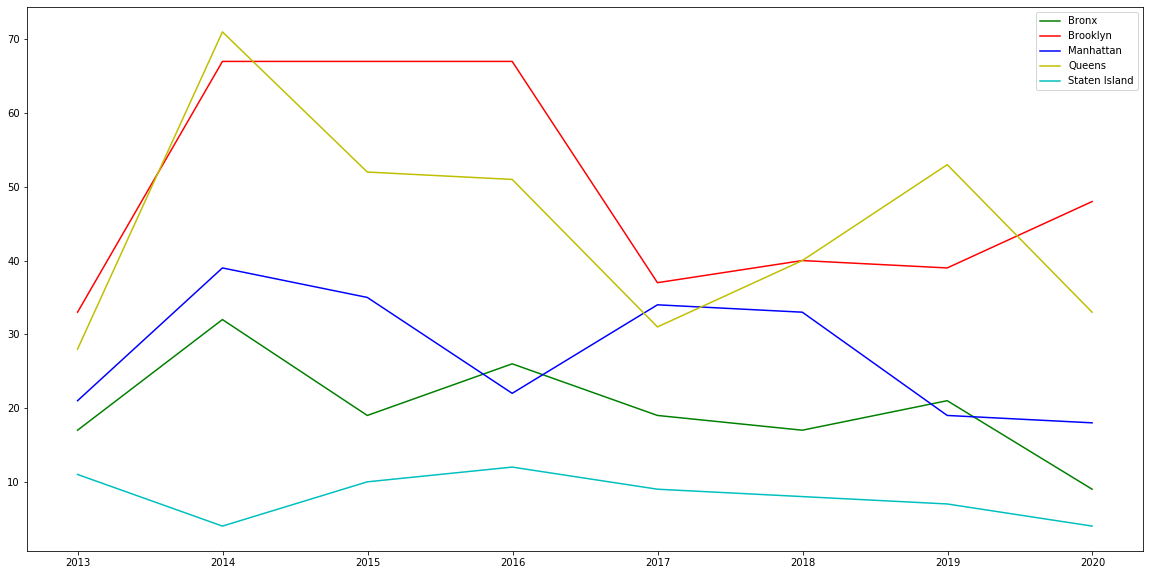

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(crash_bronx_year, '-g', label='Bronx')
plt.plot(crash_brooklyn_year,  '-r', label='Brooklyn')
plt.plot(crash_manhattan_year, '-b', label='Manhattan')
plt.plot(crash_queens_year, '-y', label='Queens')
plt.plot(crash_si_year, '-c', label='Staten Island')

plt.legend()
plt.show()

It seems like Staten Island is definitely the safest place to be, though I wonder if that is due to relative populations. From this graph, it seems like Manhattan, The Bronx, and Staten Island are getting safer, and I would want to stay out of Brooklyn and Queens!

# <center> <br>[Begining of the page](#Top)</center>